In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('EURUSD=X.csv', header=0)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-01,1.086095,1.092443,1.085293,1.086095,1.086095,0
1,2023-02-02,1.101285,1.102657,1.088767,1.101285,1.101285,0
2,2023-02-03,1.090513,1.094068,1.081105,1.090513,1.090513,0
3,2023-02-06,1.079086,1.080030,1.071834,1.079086,1.079086,0
4,2023-02-07,1.073076,1.074600,1.066951,1.073076,1.073076,0
...,...,...,...,...,...,...,...
257,2024-01-26,1.084705,1.088329,1.081338,1.084705,1.084705,0
258,2024-01-29,1.084352,1.084975,1.079715,1.084352,1.084352,0
259,2024-01-30,1.083447,1.085564,1.081268,1.083447,1.083447,0
260,2024-01-31,1.084340,1.088566,1.080766,1.084340,1.084340,0


In [3]:
df = df.drop(columns=['Volume'])

In [4]:
df

,Date,Open,High,Low,Close,Adj Close
0,2023-02-01,1.086095,1.092443,1.085293,1.086095,1.086095
1,2023-02-02,1.101285,1.102657,1.088767,1.101285,1.101285
2,2023-02-03,1.090513,1.094068,1.081105,1.090513,1.090513
3,2023-02-06,1.079086,1.080030,1.071834,1.079086,1.079086
4,2023-02-07,1.073076,1.074600,1.066951,1.073076,1.073076
...,...,...,...,...,...,...
257,2024-01-26,1.084705,1.088329,1.081338,1.084705,1.084705
258,2024-01-29,1.084352,1.084975,1.079715,1.084352,1.084352
259,2024-01-30,1.083447,1.085564,1.081268,1.083447,1.083447
260,2024-01-31,1.084340,1.088566,1.080766,1.084340,1.084340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.4+ KB


In [6]:
df.shape

(262, 6)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,1.082950,1.086174,1.079489,1.082951,1.082951
std,0.016319,0.016181,0.016195,0.016319,0.016319
min,1.047230,1.049428,1.044987,1.047230,1.047230
25%,1.070323,1.073762,1.066894,1.070323,1.070323
50%,1.085417,1.088969,1.081841,1.085417,1.085417
75%,1.094703,1.098253,1.091587,1.094703,1.094703
max,1.123760,1.127574,1.122007,1.123760,1.123760


<Axes: ylabel='Open'>

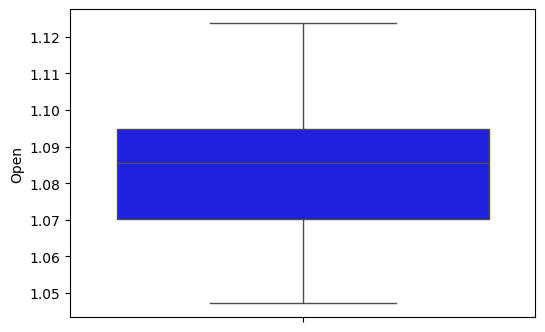

In [8]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='Open', color='blue')

In [9]:
df_no_index = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

<Axes: >

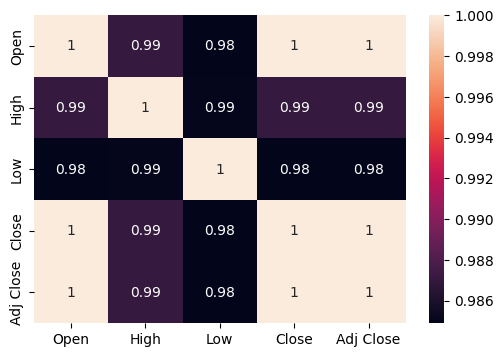

In [10]:
fig = plt.figure(figsize=(6,4))
sns.heatmap(df_no_index.corr(), annot=True)

In [16]:
df

,Date,Open,High,Low,Close,Adj Close
0,2023-02-01,1.086095,1.092443,1.085293,1.086095,1.086095
1,2023-02-02,1.101285,1.102657,1.088767,1.101285,1.101285
2,2023-02-03,1.090513,1.094068,1.081105,1.090513,1.090513
3,2023-02-06,1.079086,1.080030,1.071834,1.079086,1.079086
4,2023-02-07,1.073076,1.074600,1.066951,1.073076,1.073076
...,...,...,...,...,...,...
257,2024-01-26,1.084705,1.088329,1.081338,1.084705,1.084705
258,2024-01-29,1.084352,1.084975,1.079715,1.084352,1.084352
259,2024-01-30,1.083447,1.085564,1.081268,1.083447,1.083447
260,2024-01-31,1.084340,1.088566,1.080766,1.084340,1.084340


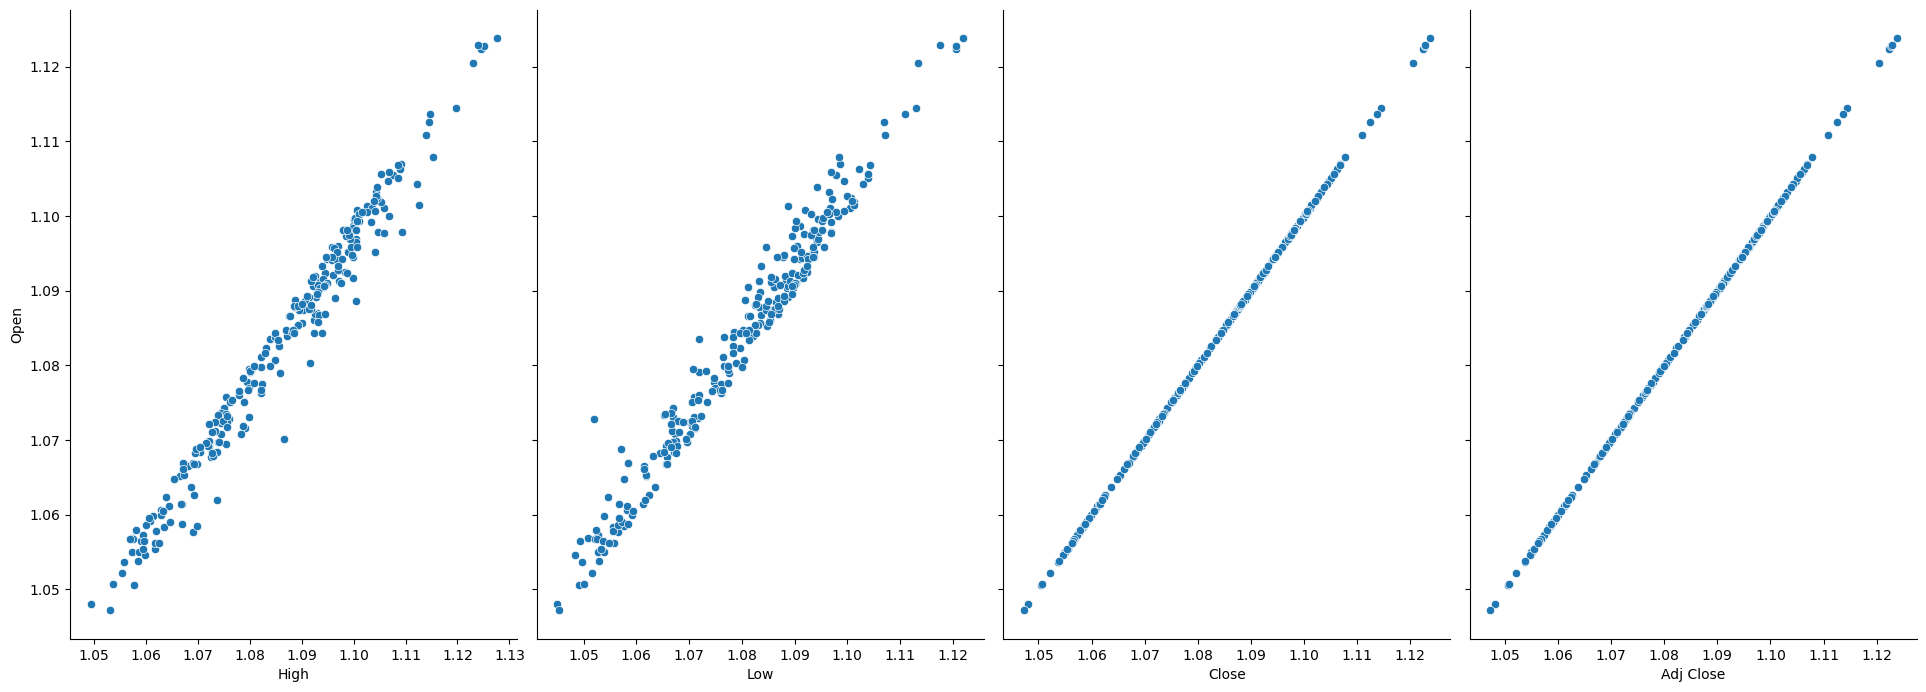

In [15]:
sns.pairplot(df, x_vars=['High', 'Low', 'Close', 'Adj Close'], y_vars='Open', height=7, aspect=0.7)

In [26]:
X = df[['High', 'Low', 'Close']]
y = df.Open

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
lr = LinearRegression()

In [50]:
m1 = lr.fit(X_train, y_train)
m1_predict = lr.predict(X_test)

r_square = r2_score(m1_predict, y_test)
adjusted_r_squared = 1 - (1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R Squared : ', adjusted_r_squared)

Adjusted R Squared :  0.999999997625627


In [35]:
m2 = lr.fit(X[['High', 'Low']], y)
m2_predict = lr.predict(X[['High', 'Low']])

r_square = r2_score(m1_predict, y)
adjusted_r_squared = 1 - (1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R Squared : ', adjusted_r_squared)

Adjusted R Squared :  0.9999998021273204


In [37]:
m3 = lr.fit(X[['Low', 'Close']], y)
m3_predict = lr.predict(X[['Low', 'Close']])

r_square = r2_score(m1_predict, y)
adjusted_r_squared = 1 - (1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R Squared : ', adjusted_r_squared)

Adjusted R Squared :  0.9999998021273204


In [38]:
m3 = lr.fit(X[['High', 'Low']], y)
m3_predict = lr.predict(X[['High', 'Low']])

r_square = r2_score(m1_predict, y)
adjusted_r_squared = 1 - (1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R Squared : ', adjusted_r_squared)

Adjusted R Squared :  0.9999998021273204


In [69]:
m4 = lr.fit(X[['High']], y)

In [44]:
predict_value = 1.2
m4_result = lr.predict(np.array(predict_value).reshape(-1,1))
print(m4)

[1.1962533]


c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
m4_results2 = lr.predict(X[['High']])

In [53]:
m1_predict2 = lr.predict(X[['High', 'Low', 'Close']])



In [55]:
df_copy = df
df_copy['predict_results'] = m1_predict2
df_copy

,Date,Open,High,Low,Close,Adj Close,predict_results
0,2023-02-01,1.086095,1.092443,1.085293,1.086095,1.086095,1.086095
1,2023-02-02,1.101285,1.102657,1.088767,1.101285,1.101285,1.101285
2,2023-02-03,1.090513,1.094068,1.081105,1.090513,1.090513,1.090513
3,2023-02-06,1.079086,1.080030,1.071834,1.079086,1.079086,1.079085
4,2023-02-07,1.073076,1.074600,1.066951,1.073076,1.073076,1.073075
...,...,...,...,...,...,...,...
257,2024-01-26,1.084705,1.088329,1.081338,1.084705,1.084705,1.084705
258,2024-01-29,1.084352,1.084975,1.079715,1.084352,1.084352,1.084351
259,2024-01-30,1.083447,1.085564,1.081268,1.083447,1.083447,1.083446
260,2024-01-31,1.084340,1.088566,1.080766,1.084340,1.084340,1.084340


In [67]:
print(len(m4))

1


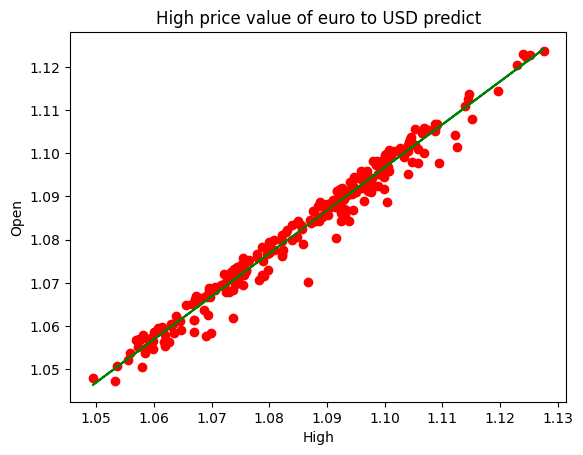

In [73]:
plt.scatter(X[['High']], y, color = "red")
plt.plot(X[['High']], m4_results2, color = "green")
plt.xlabel('High')
plt.ylabel('Open')
plt.title('High price value of euro to USD predict')
plt.show()